In [88]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as mp
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [89]:
data = pd.read_csv('E:/train.csv')
data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

# Preprocessing

In [91]:
def prep(df):
    df = df.copy()
    
    # Removing the ID colomn as it is just serial numbers
    df = df.drop('ID', axis=1)
    
    # Removing the Region Code colomn as it has high-cardinality
    df = df.drop('Region_Code', axis=1)
    
    # Filling in all the missing values
    df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace(['14+'],'14')
    df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].fillna(0)
    df['Holding_Policy_Type'] = df['Holding_Policy_Type'].fillna(0)
    df['Health Indicator'] = df['Health Indicator'].fillna(0)
    
    # Replacing strings with Binary
    df['Accomodation_Type'] = df['Accomodation_Type'].replace({'Rented': 0, 'Owned': 1})
    df['Reco_Insurance_Type'] = df['Reco_Insurance_Type'].replace({'Individual': 0, 'Joint': 1})
    df['Is_Spouse'] = df['Is_Spouse'].replace({'No': 0, 'Yes': 1})
    
    # One-hot encoding
    for column in ['City_Code', 'Health Indicator', 'Reco_Policy_Cat']:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    # Split dataframe into X and y
    y = df['Response']
    X = df.drop('Response', axis=1)
    
    # Splitting Train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [92]:
X_train, X_test, y_train, y_test = prep(data)
X_train

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Premium,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_0,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Reco_Policy_Cat_1,Reco_Policy_Cat_2,Reco_Policy_Cat_3,Reco_Policy_Cat_4,Reco_Policy_Cat_5,Reco_Policy_Cat_6,Reco_Policy_Cat_7,Reco_Policy_Cat_8,Reco_Policy_Cat_9,Reco_Policy_Cat_10,Reco_Policy_Cat_11,Reco_Policy_Cat_12,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
47215,-1.102015,-0.509835,-0.684813,-0.561071,-0.449329,0.520664,1.071175,-0.260512,-0.459940,-0.180185,-0.151873,-0.130232,-0.142412,-0.121007,-0.155131,-0.15022,-0.150903,-0.125005,-0.135592,-0.425273,-0.137512,-0.120048,-0.101755,-0.109369,-0.103154,-0.084076,-0.100051,-0.073812,-0.074957,-0.089335,3.059379,-0.032681,-0.018358,-0.054635,-0.075335,-0.050051,-0.029988,-0.02542,-0.278694,-0.167499,-0.201145,-0.197337,-0.192839,-0.210919,-0.546583,-0.586893,1.98114,-0.391043,-0.355989,-0.188570,-0.158979,-0.061453,-0.039327,-0.03635,-0.19818,-0.196182,-0.146364,-0.143944,-0.141486,-0.128775,-0.129225,-0.126503,-0.128549,-0.122786,-0.12255,-0.210337,-0.185919,-0.18519,-0.183644,-0.293850,-0.283115,-0.349042,-0.280037,3.877689,-0.33501,-0.386594
18464,0.907429,-0.509835,0.872493,0.995706,-0.449329,1.394550,1.071175,0.022441,2.174196,-0.180185,-0.151873,-0.130232,-0.142412,-0.121007,-0.155131,-0.15022,-0.150903,-0.125005,-0.135592,-0.425273,-0.137512,-0.120048,-0.101755,-0.109369,-0.103154,-0.084076,-0.100051,-0.073812,-0.074957,-0.089335,-0.326864,-0.032681,-0.018358,-0.054635,-0.075335,-0.050051,-0.029988,-0.02542,-0.278694,-0.167499,-0.201145,-0.197337,-0.192839,-0.210919,-0.546583,-0.586893,-0.50476,-0.391043,-0.355989,-0.188570,6.290156,-0.061453,-0.039327,-0.03635,-0.19818,-0.196182,-0.146364,-0.143944,-0.141486,-0.128775,-0.129225,-0.126503,-0.128549,-0.122786,-0.12255,-0.210337,-0.185919,-0.18519,-0.183644,3.403097,-0.283115,-0.349042,-0.280037,-0.257886,-0.33501,-0.386594
33790,-1.102015,1.961420,0.411069,-0.849362,-0.449329,-0.353221,0.374041,1.155161,-0.459940,-0.180185,-0.151873,-0.130232,-0.142412,-0.121007,-0.155131,-0.15022,-0.150903,-0.125005,-0.135592,-0.425273,-0.137512,-0.120048,-0.101755,-0.109369,9.694259,-0.084076,-0.100051,-0.073812,-0.074957,-0.089335,-0.326864,-0.032681,-0.018358,-0.054635,-0.075335,-0.050051,-0.029988,-0.02542,-0.278694,-0.167499,-0.201145,-0.197337,-0.192839,-0.210919,-0.546583,-0.586893,-0.50476,-0.391043,-0.355989,5.303079,-0.158979,-0.061453,-0.039327,-0.03635,-0.19818,-0.196182,-0.146364,-0.143944,-0.141486,-0.128775,-0.129225,-0.126503,-0.128549,-0.122786,-0.12255,-0.210337,-0.185919,-0.18519,-0.183644,-0.293850,-0.283115,-0.349042,-0.280037,3.877689,-0.33501,-0.386594
11408,0.907429,-0.509835,-0.223389,-0.099803,-0.449329,-0.790164,-1.020226,0.071111,-0.459940,-0.180185,-0.151873,-0.130232,-0.142412,-0.121007,-0.155131,-0.15022,6.626783,-0.125005,-0.135592,-0.425273,-0.137512,-0.120048,-0.101755,-0.109369,-0.103154,-0.084076,-0.100051,-0.073812,-0.074957,-0.089335,-0.326864,-0.032681,-0.018358,-0.054635,-0.075335,-0.050051,-0.029988,-0.02542,-0.278694,-0.167499,-0.201145,-0.197337,-0.192839,-0.210919,-0.546583,-0.586893,1.98114,-0.391043,-0.355989,-0.188570,-0.158979,-0

In [93]:
y_train.value_counts()

0    27121
1     8496
Name: Response, dtype: int64

# Training

In [94]:
model = LogisticRegression(
    class_weight={
        0: 1.0,
        1: 1
    }
)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.0, 1: 1})

# Results

In [95]:
acc = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print("Test Accuracy: {:.2f}%".format(acc * 100))


Test Accuracy: 75.68%


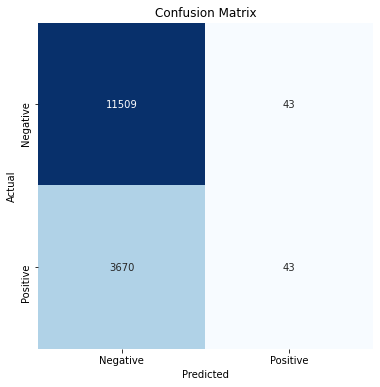

Classification Report:
----------------------
               precision    recall  f1-score   support

    Negative       0.76      1.00      0.86     11552
    Positive       0.50      0.01      0.02      3713

    accuracy                           0.76     15265
   macro avg       0.63      0.50      0.44     15265
weighted avg       0.70      0.76      0.66     15265



In [96]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
clr = classification_report(y_test, y_pred, labels=[0, 1], target_names=["Negative", "Positive"])

mp.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
mp.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
mp.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
mp.xlabel("Predicted")
mp.ylabel("Actual")
mp.title("Confusion Matrix")
mp.show()

print("Classification Report:\n----------------------\n", clr)

# Training 2

In [97]:
model = LogisticRegression(
    class_weight={
        0: 1.0,
        1: 3
    }
)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.0, 1: 3})

# Results 2

In [98]:
acc = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print("Test Accuracy: {:.2f}%".format(acc * 100))



Test Accuracy: 59.47%


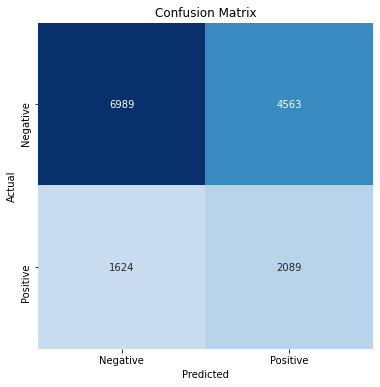

Classification Report:
----------------------
               precision    recall  f1-score   support

    Negative       0.81      0.61      0.69     11552
    Positive       0.31      0.56      0.40      3713

    accuracy                           0.59     15265
   macro avg       0.56      0.58      0.55     15265
weighted avg       0.69      0.59      0.62     15265



In [99]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
clr = classification_report(y_test, y_pred, labels=[0, 1], target_names=["Negative", "Positive"])

mp.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
mp.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
mp.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
mp.xlabel("Predicted")
mp.ylabel("Actual")
mp.title("Confusion Matrix")
mp.show()

print("Classification Report:\n----------------------\n", clr)